The content:  
The decoded:  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xc0\x00\x0b\x08\x00x\x00x\x01\x01\x11\x00\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf2\xf3\xf4\xf5\xf6\xf7\xf8\xf
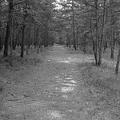
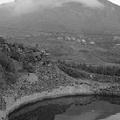
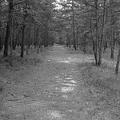

In [38]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import base64
import io
from PIL import Image
import dash_bootstrap_components as dbc
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

# Getting the models
# GANS
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
def generator_loss(fake_output , real_y):
    real_y = tf.cast( real_y , 'float32' )
    return mse( fake_output , real_y )
generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
GANS_generator = load_model(r'GANS\generator.keras', custom_objects={'generator_loss': generator_loss, 'generator_optimizer': generator_optimizer})
GANS_discriminator = load_model(r'GANS\discriminator.keras', custom_objects={'discriminator_loss': discriminator_loss, 'discriminator_optimizer': discriminator_optimizer})





# Define the Dash app
app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

# Define the layout of the web page
app.layout = dbc.Container(
    fluid=True,
    style={
        'backgroundImage': 'url("/assets/splash.jpg")',
        'backgroundRepeat': 'no-repeat',
        'backgroundPosition': 'center',
        'backgroundSize': 'cover',
        'position': 'relative', 
        'minHeight': '100vh',
    },
    children=[
        dbc.Row(
            [
                dbc.Col(
                    dbc.Card(
                        dbc.CardBody(
                            [
                                html.H1('Revive your pictures with a splash of colors!', className="display-3"),
                                html.P("Welcome to Colorify, where black and white memories find their vibrant voice! Reveal the hidden beauty of the past with our innovative models!",
                                       className="lead"),
                                html.Hr(className="my-2"),
                                html.P("Select a model:"),
                                dbc.ButtonGroup(
                                    [dbc.Button('Using GANs', id='gans', color="primary", className="mr-1"),
                                     dbc.Button('Using Autoencoders', id='autoencoders', color="primary", className="mr-1"),
                                     dbc.Button('Using OpenCV', id='opencv', color="primary", className="mr-1")],
                                    size="lg"
                                ),
                            ]
                        ),
                        className="mb-3",
                    ),
                    width=12,
                    className="text-center",
                ),
            ]
        ),
        dbc.Row(
    [
        dbc.Col(
            [
                html.H2('Original Image:', className="mb-2 mt-2"),

                dcc.Upload(
                    id='upload-image',
                    children=html.Div(['Drag and Drop or ', html.A('Select an Image')]),
                    style={
                        'width': '450px',  
                        'height': '500px',  
                        'lineHeight': '300px',  
                        'borderWidth': '2px',
                        'borderStyle': 'dashed',
                        'borderRadius': '5px',
                        'textAlign': 'center',
                        'margin': '10px',
                        'padding': '20px',
                    },
                    accept='image/*'
                ),
            ],
            width=6,
            className="text-left",
        ),
        dbc.Col(width=3), 
        dbc.Col(
            [
                html.H2('Output Image:', className="mb-2 mt-2"),
                html.Div(id='output-image-upload', style={
                        'width': '450px',  
                        'height': '500px',  
                        'lineHeight': '300px',  
                        'borderWidth': '2px',
                        'borderStyle': 'dashed',
                        'borderRadius': '5px',
                        'textAlign': 'center',
                        'margin': '10px',
                        'padding': '20px',}),
            ],
            width=3, 
            className="text-left",
        ),
    ],
    justify="between", 
),
    ],
)
@app.callback(
    Output('upload-image', 'children'),
    [Input('upload-image', 'contents')],
    [State('upload-image', 'filename')]
)
def update_output(contents, filename):
    if contents is not None:
        content_type, content_string = contents.split(',')
        print("The content: ", contents)
        decoded = base64.b64decode(content_string)
        print("The decoded: ", decoded)
        try:
            if 'jpg' in filename:
                data = Image.open(io.BytesIO(decoded))
        except Exception as e:
            print(e)
            return html.Div([
                'There was an error processing this file.'
            ])

        return html.Div([
            html.Img(src=contents, style={'height':'100%', 'width':'100%'}),
            html.Hr(),
            html.H5(filename)
        ])

    return html.Div(['Drag and Drop or ', html.A('Select an Image')])

# Callback to display the uploaded image for GANS
@app.callback(
    Output('output-image-upload', 'children'),
    [Input('gans', 'n_clicks')],
    [State('upload-image', 'contents')]
     
)
def GANS_output(n_clicks, contents):
    if n_clicks is not None and contents is not None:
        content_type, content_string = contents.split(',')
        decoded = base64.b64decode(content_string)
        image = Image.open(io.BytesIO(decoded)).resize((120, 120))
        gray_img_array = (np.asarray(image).reshape((1, 120, 120, 1))) / 255  # Add an extra dimension
        y = GANS_generator(gray_img_array).numpy()
        output = Image.fromarray(( y[0] * 255 ).astype( 'uint8' )).resize( ( 400 , 400 ) ) 
        output = np.asarray( output )
        # Convert the colorized image to a base64 string
        buffered = io.BytesIO()
        Image.fromarray(output).save(buffered, format="JPEG")
        img_str = base64.b64encode(buffered.getvalue()).decode()
        return html.Img(src='data:image/jpeg;base64,'+img_str)
        

if __name__ == '__main__':
    app.run_server(port=4051)